# Study - Orbiting bodies
This notebook intends to study the relative motion between two or more orbiting bodies in order to achieve the effect of one body orbiting another.

In [43]:
import sys
sys.path.append("../../src")
from maneuvers import Maneuvers
import auxiliary, constants, models, coordinates
import numpy as np
import ipywidgets as ipw
import ipyvolume as ipv
import matplotlib.pyplot as plt
from datetime import datetime
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## General overview relative motion between of two orbiting bodies:
In the following piece of code two spacecrafts are defined orbiting the Earth (named Cubesat and Chipsat), the relative motion is then calculated and plotted. In this implementation, the use of ipywidgets allows for a <i>live</i> update of the plots in order to get a general overview of the shapes (orbits) formed when different orbital parameters are modified for the orbits. The number or orbits calculated can be controlled modifying the <i>n</i> parameter.

In [44]:
n = 10
# SPACECRAFT DEFINITIONS
cubesat = models.Cubesat("3U")
chipsat = models.Spacecraft(10e-3,10e-3,1e-2*1e-2)

# INITIAL CONDITIONS
coe = [7000e3,0.01,0,0,0,0]
date = datetime.now()
T = 2*np.pi*(coe[0]**3/constants.mu_E)**0.5

# MANEUVERING
cubesatManeuvers = Maneuvers(coe,cubesat,date)
cubesatManeuvers.terminalConditions["depleted_propellant"] = False
coe2 = np.array(coe)
coe2[0] = 7050e3
coe2[1] = 0.02
chipsatManeuvers = Maneuvers(coe2,chipsat,date)
chipsatManeuvers.terminalConditions["depleted_propellant"] = False
cubesatManeuvers.propagate(T*n,T/36,max_step=T/36)
chipsatManeuvers.propagate(T*n,T/36,max_step=T/36)

# Relative Motion
rel_r = chipsatManeuvers.history.r-cubesatManeuvers.history.r
rel_r_SC = np.zeros([cubesatManeuvers.history.r.shape[0],3])
for idx in range(0,cubesatManeuvers.history.r.shape[0]):
    r = cubesatManeuvers.history.r[idx,:]
    v = cubesatManeuvers.history.v[idx,:]
    rel_r_SC[idx,:] = coordinates.eci2rsw(r,v,rel_r[idx,:])
    
fig = cubesatManeuvers.ipvPlot3D();
fig = chipsatManeuvers.ipvPlot3D(fig=fig);
fig.camera.position = (0.5,0.5,0.5)
fig.height = 300
fig.width = 350

fig2 = ipv.figure(height = fig.height,width = fig.width);
fig2.camera.position = (0.5,0.5,0.5)
ipv.pylab.plot(rel_r_SC[:,0]/1000,rel_r_SC[:,2]/1000,rel_r_SC[:,1]/1000)
ipv.pylab.scatter(np.array([0.0]),np.array([0.0]),np.array([0.0]),color="black",marker="sphere")
ipv.pylab.xlabel("R")
ipv.pylab.ylabel("W")
ipv.pylab.zlabel("S")
ipv.pylab.style.box_off()
ipv.pylab.xyzlim(1e3)
#ipv.show()
display(ipw.HBox([fig,fig2]))

def updateCubesat(a="7000",e="0.01",i="0",omega="0",Omega="0",nu="0"):
    global cubesatManeuvers
    global chipsatManeuvers
    
    a,e,i,omega,Omega,nu = float(a),float(e),float(i),float(omega),float(Omega),float(nu)
    # INITIAL CONDITIONS
    coe = [a*1e3,e,i*np.pi/180,omega*np.pi/180,Omega*np.pi/180,nu*np.pi/180]
    date = datetime.now()
    T = 2*np.pi*(coe[0]**3/constants.mu_E)**0.5

    # MANEUVERING
    cubesatManeuvers = Maneuvers(coe,cubesat,date)
    cubesatManeuvers.terminalConditions["depleted_propellant"] = False
    cubesatManeuvers.propagate(T*n,T/36,max_step=T/36)
    #print(fig.scatters[0].z)
    fig.scatters[0].x = cubesatManeuvers.history.r[:,0]/1e3
    fig.scatters[0].y = cubesatManeuvers.history.r[:,2]/1e3
    fig.scatters[0].z = cubesatManeuvers.history.r[:,1]/1e3
    
    # Relative Motion
    rel_r = chipsatManeuvers.history.r-cubesatManeuvers.history.r
    rel_r_SC = np.zeros([cubesatManeuvers.history.r.shape[0],3])
    for idx in range(0,cubesatManeuvers.history.r.shape[0]):
        r = cubesatManeuvers.history.r[idx,:]
        v = cubesatManeuvers.history.v[idx,:]
        rel_r_SC[idx,:] = coordinates.eci2rsw(r,v,rel_r[idx,:])
    fig2.scatters[0].x = rel_r_SC[:,0]/1e3
    fig2.scatters[0].y = rel_r_SC[:,2]/1e3
    fig2.scatters[0].z = rel_r_SC[:,1]/1e3
    
    
def updateChipsat(a="7050",e="0.02",i="0",omega="0",Omega="0",nu="0"):
    global cubesatManeuvers
    global chipsatManeuvers
    
    a,e,i,omega,Omega,nu = float(a),float(e),float(i),float(omega),float(Omega),float(nu)
    # INITIAL CONDITIONS
    coe2 = [a*1e3,e,i*np.pi/180,omega*np.pi/180,Omega*np.pi/180,nu*np.pi/180]
    date = datetime.now()
    T = 2*np.pi*(coe[0]**3/constants.mu_E)**0.5

    # MANEUVERING
    chipsatManeuvers = Maneuvers(coe2,chipsat,date)
    chipsatManeuvers.terminalConditions["depleted_propellant"] = False
    chipsatManeuvers.propagate(T*n,T/36,max_step=T/36)
    #print(fig.scatters[0].z)
    fig.scatters[1].x = chipsatManeuvers.history.r[:,0]/1e3
    fig.scatters[1].y = chipsatManeuvers.history.r[:,2]/1e3
    fig.scatters[1].z = chipsatManeuvers.history.r[:,1]/1e3
    
    # Relative Motion
    rel_r = chipsatManeuvers.history.r-cubesatManeuvers.history.r
    rel_r_SC = np.zeros([cubesatManeuvers.history.r.shape[0],3])
    for idx in range(0,cubesatManeuvers.history.r.shape[0]):
        r = cubesatManeuvers.history.r[idx,:]
        v = cubesatManeuvers.history.v[idx,:]
        rel_r_SC[idx,:] = coordinates.eci2rsw(r,v,rel_r[idx,:])
    fig2.scatters[0].x = rel_r_SC[:,0]/1e3
    fig2.scatters[0].y = rel_r_SC[:,2]/1e3
    fig2.scatters[0].z = rel_r_SC[:,1]/1e3
    
interact1 = ipw.interactive(updateCubesat,{'manual' : True, 'manual_name' : 'Update'},
                            a="7000", e="0.01", i="0", omega="0", Omega="0", nu="0");
interact2 = ipw.interactive(updateChipsat,{'manual' : True, 'manual_name' : 'Update'},
                            a="7050", e="0.02", i="0", omega="0", Omega="0", nu="0");
display(ipw.HBox([interact1,interact2]));

Propagating...from day  0.0  to  0.6749367926675345
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  0.0  to  0.6749367926675345
The solver successfully reached the end of the integration interval. (Status Code: 0)



In can be observerd by modifying the previous parameters that a perfect orbit is achieved when the semi-major axes of both orbits are the same. When different, the orbit transform into a spiral and the orbiting body starts to get farther away from the main body as time passes. The orbiting body, however, does eventually come back closer to the main body but from the other direction (the orbiting body spirals along the mains body orbit).
Another observation can be made with respect to the eccentricity difference of both body orbits. When the eccentricities are the same (and omega, Omega and nu are the same), the orbiting body will allways intersect (collide) with the main body.

## Ejection of Chipsat from Cubesat
The following code it is evaluated whether it is possible to leave a Chipsat orbiting a main body (Cubesat) by merely ejecting it in any direction. In this case, the chipsat ejection is modeled as an instantaneous change in velocity.

### Case 1: Radial Ejection

Propagating...from day  0.0  to  0.19729007430860915
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  0.0  to  0.19729007430860915
The solver successfully reached the end of the integration interval. (Status Code: 0)



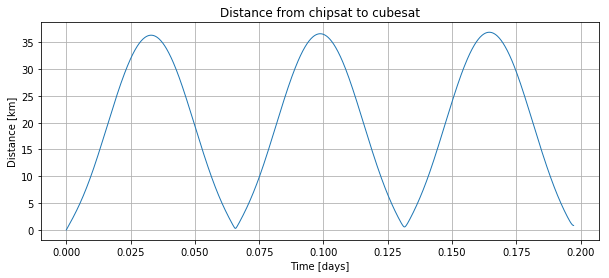

In [45]:
n = 3
# SPACECRAFT DEFINITIONS
cubesat = models.Cubesat("3U")
chipsat = models.Spacecraft(10e-3,10e-3,1e-2*1e-2)

# INITIAL CONDITIONS
coe,date = auxiliary.parseTle("../../suchai0.tle")
T = 2*np.pi*(coe[0]**3/constants.mu_E)**0.5

# MANEUVERING
#Definitions
cubesatManeuvers = Maneuvers(coe,cubesat,date)
chipsatManeuvers = Maneuvers(coe,chipsat,date)
cubesatManeuvers.terminalConditions["depleted_propellant"] = False
chipsatManeuvers.terminalConditions["depleted_propellant"] = False
#Chipsat radial ejection (10 m/s)
chipsatManeuvers.impulsiveManeuver(np.array([10,0,0]))
#Propagation of both bodies
cubesatManeuvers.propagate(T*n,T/360,max_step=T/360)
chipsatManeuvers.propagate(T*n,T/360,max_step=T/360)

# Relative Motion
rel_r = chipsatManeuvers.history.r-cubesatManeuvers.history.r
rel_r_SC = np.zeros([cubesatManeuvers.history.r.shape[0],3])
for idx in range(0,cubesatManeuvers.history.r.shape[0]):
    r = cubesatManeuvers.history.r[idx,:]
    v = cubesatManeuvers.history.v[idx,:]
    rel_r_SC[idx,:] = coordinates.eci2rsw(r,v,rel_r[idx,:])

fig3 = ipv.figure(height = 400,width = 900);
fig3.camera.position = (0.5,0.5,0.5)
ipv.pylab.plot(rel_r_SC[:,0]/1000,rel_r_SC[:,2]/1000,rel_r_SC[:,1]/1000)
ipv.pylab.scatter(np.array([0.0]),np.array([0.0]),np.array([0.0]),color="black",marker="sphere")
ipv.pylab.xlabel("R")
ipv.pylab.ylabel("W")
ipv.pylab.zlabel("S")
ipv.pylab.style.box_off()
ipv.pylab.xyzlim(1e2)
ipv.show()

%matplotlib inline
cubesatManeuvers.plot("singleItem",np.linalg.norm(rel_r_SC,axis=1)/1e3);
plt.ylabel("Distance [km]");
plt.title("Distance from chipsat to cubesat");

As we can observe, in the case the Chipsat is ejected in the radial direction, it is only capable of achieving one full turn before it crashes again with the Cubesat. It can be also seen (although very slughtly in this example) that with each turn, the chipsat gets farther away from the cubesat in the tangential direction. If we were to apply a greater impulsive ejection, it would form a spiral in the tangential direction.

### Case 2: Tangential Ejection

Propagating...from day  0.0  to  26.305343241147884
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  0.0  to  26.305343241147884
The solver successfully reached the end of the integration interval. (Status Code: 0)



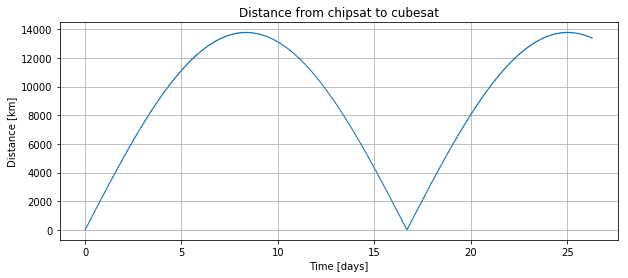

In [46]:
n = 400
# SPACECRAFT DEFINITIONS
cubesat = models.Cubesat("3U")
chipsat = models.Spacecraft(10e-3,10e-3,1e-2*1e-2)

# INITIAL CONDITIONS
coe,date = auxiliary.parseTle("../../suchai0.tle")
T = 2*np.pi*(coe[0]**3/constants.mu_E)**0.5

# MANEUVERING
#Definitions
cubesatManeuvers = Maneuvers(coe,cubesat,date)
chipsatManeuvers = Maneuvers(coe,chipsat,date)
cubesatManeuvers.terminalConditions["depleted_propellant"] = False
chipsatManeuvers.terminalConditions["depleted_propellant"] = False
#Chipsat radial ejection (10 m/s)
chipsatManeuvers.impulsiveManeuver(np.array([0,10,0]))
#Propagation of both bodies
cubesatManeuvers.propagate(T*n,T/36,max_step=T/36)
chipsatManeuvers.propagate(T*n,T/36,max_step=T/36)

# Relative Motion
rel_r = chipsatManeuvers.history.r-cubesatManeuvers.history.r
rel_r_SC = np.zeros([cubesatManeuvers.history.r.shape[0],3])
for idx in range(0,cubesatManeuvers.history.r.shape[0]):
    r = cubesatManeuvers.history.r[idx,:]
    v = cubesatManeuvers.history.v[idx,:]
    rel_r_SC[idx,:] = coordinates.eci2rsw(r,v,rel_r[idx,:])

fig3 = ipv.figure(height = 400,width = 800);
fig3.camera.position = (0.5,0.5,0.5)
ipv.pylab.plot(rel_r_SC[:,0]/1000,rel_r_SC[:,2]/1000,rel_r_SC[:,1]/1000)
ipv.pylab.scatter(np.array([0.0]),np.array([0.0]),np.array([0.0]),color="black",marker="sphere")
ipv.pylab.xlabel("R")
ipv.pylab.ylabel("W")
ipv.pylab.zlabel("S")
ipv.pylab.style.box_off()
ipv.pylab.xyzlim(1e2)
ipv.show()

cubesatManeuvers.plot("singleItem",np.linalg.norm(rel_r_SC,axis=1)/1e3);
plt.ylabel("Distance [km]");
plt.title("Distance from chipsat to cubesat");

As we can observe, in the case the Chipsat is ejected in the tangential direction (in the direction of velocity), it starts to get each time farther away from the Cubesat, describing a spiral in the tangential direction. In this case, depending on the direction of radial ejection, the Chipsat will get further away in a different tangential direction.

The cubesat eventually comes back to the Cubesat from the other direction of the orbit, meaning there is still a chance for the Chipsat to eventually crash with the Cubesat although after many close encounters.

### Case 3: Normal Ejection

Propagating...from day  0.0  to  0.19729007430860915
The solver successfully reached the end of the integration interval. (Status Code: 0)

Propagating...from day  0.0  to  0.19729007430860915
The solver successfully reached the end of the integration interval. (Status Code: 0)



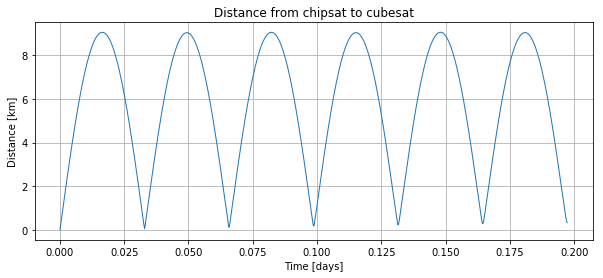

In [47]:
n = 3
# SPACECRAFT DEFINITIONS
cubesat = models.Cubesat("3U")
chipsat = models.Spacecraft(10e-3,10e-3,1e-2*1e-2)

# INITIAL CONDITIONS
coe,date = auxiliary.parseTle("../../suchai0.tle")
T = 2*np.pi*(coe[0]**3/constants.mu_E)**0.5

# MANEUVERING
#Definitions
cubesatManeuvers = Maneuvers(coe,cubesat,date)
chipsatManeuvers = Maneuvers(coe,chipsat,date)
cubesatManeuvers.terminalConditions["depleted_propellant"] = False
chipsatManeuvers.terminalConditions["depleted_propellant"] = False
#Chipsat radial ejection (10 m/s)
chipsatManeuvers.impulsiveManeuver(np.array([0,0,10]))
#Propagation of both bodies
cubesatManeuvers.propagate(T*n,T/360,max_step=T/360)
chipsatManeuvers.propagate(T*n,T/360,max_step=T/360)

# Relative Motion
rel_r = chipsatManeuvers.history.r-cubesatManeuvers.history.r
rel_r_SC = np.zeros([cubesatManeuvers.history.r.shape[0],3])
for idx in range(0,cubesatManeuvers.history.r.shape[0]):
    r = cubesatManeuvers.history.r[idx,:]
    v = cubesatManeuvers.history.v[idx,:]
    rel_r_SC[idx,:] = coordinates.eci2rsw(r,v,rel_r[idx,:])

fig3 = ipv.figure(height = 400,width = 900);
fig3.camera.position = (0.5,0.5,0.5)
ipv.pylab.plot(rel_r_SC[:,0]/1000,rel_r_SC[:,2]/1000,rel_r_SC[:,1]/1000)
ipv.pylab.scatter(np.array([0.0]),np.array([0.0]),np.array([0.0]),color="black",marker="sphere")
ipv.pylab.xlabel("R")
ipv.pylab.ylabel("W")
ipv.pylab.zlabel("S")
ipv.pylab.style.box_off()
ipv.pylab.xyzlim(1e1)
ipv.show()

cubesatManeuvers.plot("singleItem",np.linalg.norm(rel_r_SC,axis=1)/1e3);
plt.ylabel("Distance [km]");
plt.title("Distance from chipsat to cubesat");

As we can observe, in the case where the Chipsat is ejected in the normal direction (pointing outwards of the orbital plane), it describes a straight line. The Chipsat, therefore, only "orbits" for a few moments before crashing into the Cubesat.

## Conclusions
It is NOT possible to make a Chipsat orbit a Cubesat by merely ejecting it from the main body when no external perturbations are considered. In order to achieve the orbiting effect, an additional impulse on the Chipsat would be needed AFTER it is ejected.